# This is the example of IsolationForest that we have used to classify the anomaly



# IsolationForest example

An example using :class:`~sklearn.ensemble.IsolationForest` for anomaly
detection.

The `isolation_forest` is an ensemble of "Isolation Trees" that "isolate"
observations by recursive random partitioning, which can be represented by a
tree structure. The number of splittings required to isolate a sample is lower
for outliers and higher for inliers.

In the present example we demo two ways to visualize the decision boundary of an
Isolation Forest trained on a toy dataset.


## Data generation

We generate two clusters (each one containing `n_samples`) by randomly
sampling the standard normal distribution as returned by
:func:`numpy.random.randn`. One of them is spherical and the other one is
slightly deformed.

For consistency with the :class:`~sklearn.ensemble.IsolationForest` notation,
the inliers (i.e. the gaussian clusters) are assigned a ground truth label `1`
whereas the outliers (created with :func:`numpy.random.uniform`) are assigned
the label `-1`.



In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

We can visualize the resulting clusters:



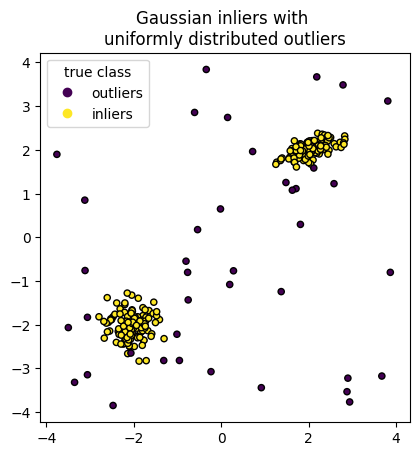

In [2]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

## Training of the model



In [3]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=0)

## Plot discrete decision boundary

We use the class :class:`~sklearn.inspection.DecisionBoundaryDisplay` to
visualize a discrete decision boundary. The background color represents
whether a sample in that given area is predicted to be an outlier
or not. The scatter plot displays the true labels.



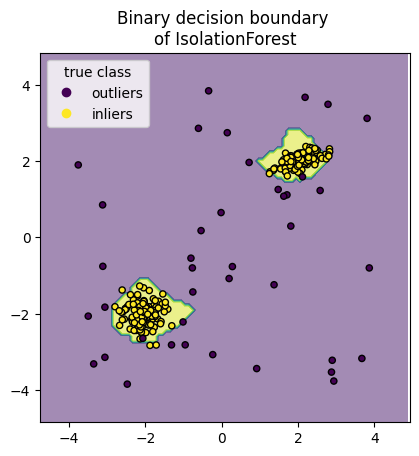

In [4]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.show()

## Plot path length decision boundary

By setting the `response_method="decision_function"`, the background of the
:class:`~sklearn.inspection.DecisionBoundaryDisplay` represents the measure of
normality of an observation. Such score is given by the path length averaged
over a forest of random trees, which itself is given by the depth of the leaf
(or equivalently the number of splits) required to isolate a given sample.

When a forest of random trees collectively produce short path lengths for
isolating some particular samples, they are highly likely to be anomalies and
the measure of normality is close to `0`. Similarly, large paths correspond to
values close to `1` and are more likely to be inliers.



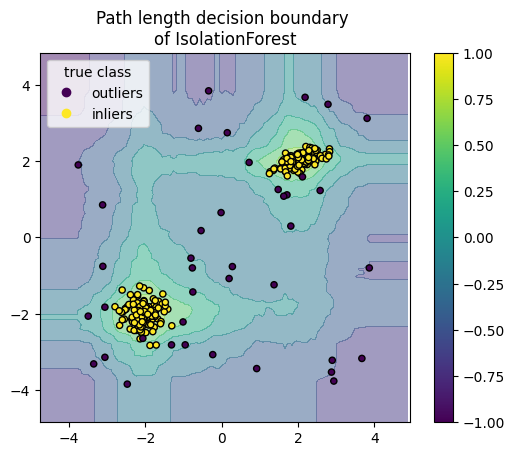

In [5]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()